# Purpose of Analysis:

The purpose of your analysis is to provide insights into the customer behavior related to the purchase of Chips. Specifically, you need to understand:

* **Types of Customers**: Identify different customer segments who purchase Chips.
* **Purchasing Behavior**: Analyze how these customer segments behave in terms of purchasing Chips within the region.
* **Key Drivers**: Determine what factors (such as demographics, buying patterns, etc.) influence sales of Chips.
* **Recommendations**: Based on your analysis, make recommendations on which customer segments to target and any adjustments that should be made to packet sizes.

# TASK
My task is to analyze transaction and customer data related to chip purchases using  Python. Start by checking data integrity, handling outliers, and deriving metrics such as total sales, purchase frequency, and customer segmentation. Formulate strategic recommendations based on these insights to assist Julia, the Category Manager, in her upcoming review.

# Metrics to Describe Customer Purchasing Behavior:

When analyzing customer purchasing behavior for chips, consider the following metrics to derive insights:

1. **Total Sales**: Aggregate sales amount per customer.
2. **Purchase Frequency:** How often do customers purchase chips?
3. **Average Basket Size:** Average quantity of chips bought per transaction.
4. **Customer Segmentation:** Identify distinct groups of customers based on:
* Demographics (if available)
* Purchase patterns (e.g., heavy buyers, occasional buyers)
* Geographic factors (if relevant)
5. **Basket Composition:** Analyze what other items are typically bought with chips (cross-selling opportunities).
6. **Seasonal Trends:** Explore variations in purchasing behavior across different times of the year.
7. **Brand and Pack Size Preferences:** Which brands or pack sizes are popular among different customer segments?

# Strategic Recommendations:

Based on the insights derived from the analysis, formulate strategic recommendations that Julia can use for the category review:

*** Segment Targeting:** Recommend which customer segments to focus on (e.g., heavy buyers, new customers).
* **Product Assortment:** Suggest adjustments to the range of chip products offered based on popularity and customer preferences.
* **Promotional Strategies:** Propose promotional tactics (e.g., discounts, bundling) tailored to different customer segments.
* **Market Expansion**: Identify potential new markets or regions based on customer behavior analysis.
* 

In [1]:
# import libary's

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore warnings for cleaner output (optional)
warnings.filterwarnings('ignore')

# File path to your CSV data file



In [2]:
purchase = pd.read_csv('/kaggle/input/data-analysis/QVI_purchase_behaviour.csv')
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
transaction = pd.read_csv('/kaggle/input/data-analysis/QVI_transaction_data(in).csv')
transaction['DATE'] =  pd.to_datetime(transaction['DATE'])
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
print(purchase.shape)
print('\n',purchase.dtypes)
print('\n', purchase.info())
print('\n',"Duplicate :",purchase.duplicated().sum())
print('\n',"NULL VALUE :","\n",purchase.isnull().sum())


(72637, 3)

 LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

 None

 Duplicate : 0

 NULL VALUE : 
 LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [5]:
print(transaction.shape)
print('\n',transaction.dtypes)
print('\n', transaction.info())
print('\n',"Duplicate :",transaction.duplicated().sum())
print('\n',"NULL VALUE :","\n",transaction.isnull().sum())


(264836, 8)

 DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory us

TRANSACTION TABLE :

convert date colunm into datetime;

In [6]:
# marging data 

df = pd.merge(purchase,transaction,how ="inner",on='LYLTY_CARD_NBR')
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [7]:
print(df.shape)
print('\n',df.dtypes)
print('\n', df.info())
print('\n',"Duplicate :",df.duplicated().sum())
print('\n',"NULL VALUE :","\n",df.isnull().sum())

(264836, 10)

 LYLTY_CARD_NBR               int64
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
DATE                datetime64[ns]
STORE_NBR                    int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264836 non-null  int64         
 1   LIFESTAGE         264836 non-null  object        
 2   PREMIUM_CUSTOMER  264836 non-null  object        
 3   DATE              264836 non-null  datetime64[ns]
 4   STORE_NBR         264836 non-null  int64         
 5   TXN_ID            264836 non-null  int64         
 6   PROD_NBR          264836 non-null  int64         
 7   PROD_NAME 

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.648350e+05,264835,264835.000000,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,1.355496e+05,2018-12-30 00:52:42.252723200,135.080216,1.351584e+05,56.583201,1.907308,7.304205
min,1.000000e+03,2018-07-01 00:00:00,1.000000,1.000000e+00,1.000000,1.000000,1.500000
25%,7.002100e+04,2018-09-30 00:00:00,70.000000,6.760100e+04,28.000000,2.000000,5.400000
50%,1.303580e+05,2018-12-30 00:00:00,130.000000,1.351380e+05,56.000000,2.000000,7.400000
75%,2.030945e+05,2019-03-31 00:00:00,203.000000,2.027015e+05,85.000000,2.000000,9.200000
max,2.373711e+06,2019-06-30 00:00:00,272.000000,2.415841e+06,114.000000,200.000000,650.000000
std,8.058011e+04,NaN,76.784306,7.813316e+04,32.826692,0.643655,3.083231


* date column  indicate that data stored 1 year of record . start date = 2018-07-01 ,end date = 2019-06-30
* PROD_QTY and TOT_SALES have available outlier's

In [10]:
num = df.select_dtypes('int64','float64').columns
cate =  df.select_dtypes('object').columns

print("NUMBER COLUMNS : ",num)
print('\n','\n')
print("CATEGORYCAL COLUMNS :", cate)


NUMBER COLUMNS :  Index(['LYLTY_CARD_NBR', 'STORE_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY'], dtype='object')

 

CATEGORYCAL COLUMNS : Index(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'PROD_NAME'], dtype='object')


In [11]:
def remove_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_df

# Remove outliers from TOT_SALES
df_no_outliers_tot_sales = remove_outliers(df, 'TOT_SALES')

# Remove outliers from PROD_QTY
df_no_outliers_prod_qty = remove_outliers(df_no_outliers_tot_sales, 'PROD_QTY')

# Display the filtered DataFrame


In [12]:
df= df_no_outliers_prod_qty
df.describe()


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.360380e+05,236038,236038.000000,2.360380e+05,236038.000000,236038.0,236038.000000
mean,1.356217e+05,2018-12-29 23:36:52.331912960,135.217016,1.353047e+05,56.553462,2.0,7.675752
min,1.000000e+03,2018-07-01 00:00:00,1.000000,1.000000e+00,1.000000,2.0,2.700000
25%,7.009200e+04,2018-10-03 00:00:00,70.000000,6.801925e+04,28.000000,2.0,6.000000
50%,1.301860e+05,2018-12-30 00:00:00,130.000000,1.344140e+05,56.000000,2.0,7.600000
75%,2.031780e+05,2019-03-28 00:00:00,203.000000,2.030148e+05,85.000000,2.0,9.200000
max,2.373711e+06,2019-06-30 00:00:00,272.000000,2.415841e+06,114.000000,2.0,13.000000
std,7.923851e+04,NaN,76.239827,7.763409e+04,32.821592,0.0,2.215836


In [13]:
df.shape

(236038, 10)

In [14]:
cat_col = df.select_dtypes(['object']).columns
for i in range(len(cat_col)):
    print( df[cat_col[i]].value_counts())
    

LIFESTAGE
OLDER SINGLES/COUPLES     48973
OLDER FAMILIES            45140
RETIREES                  43755
YOUNG FAMILIES            40184
YOUNG SINGLES/COUPLES     29853
MIDAGE SINGLES/COUPLES    22257
NEW FAMILIES               5876
Name: count, dtype: int64
PREMIUM_CUSTOMER
Mainstream    90563
Budget        83358
Premium       62117
Name: count, dtype: int64
PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3004
Cobs Popd Sea Salt  Chips 110g              2979
Kettle Tortilla ChpsHny&Jlpno Chili 150g    2961
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    2950
Tostitos Splash Of  Lime 175g               2936
                                            ... 
RRD Pc Sea Salt     165g                    1246
WW Crinkle Cut      Original 175g           1242
Sunbites Whlegrn    Crisps Frch/Onin 90g    1240
NCC Sour Cream &    Garden Chives 175g      1238
French Fries Potato Chips 175g              1213
Name: count, Length: 114, dtype: int64


<Axes: xlabel='TOT_SALES', ylabel='Count'>

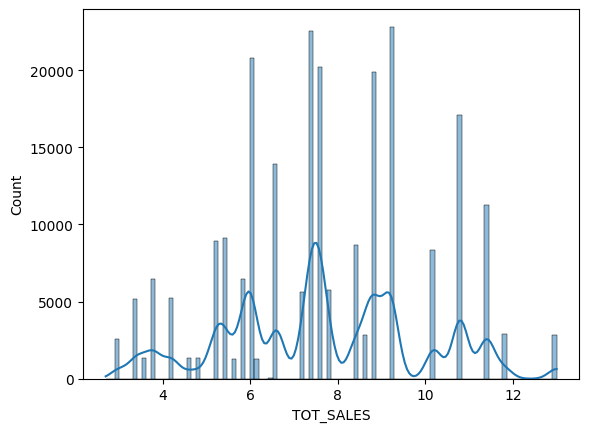

In [15]:
sns.histplot(data=df,x='TOT_SALES',kde=True)

<Axes: xlabel='PROD_QTY', ylabel='Count'>

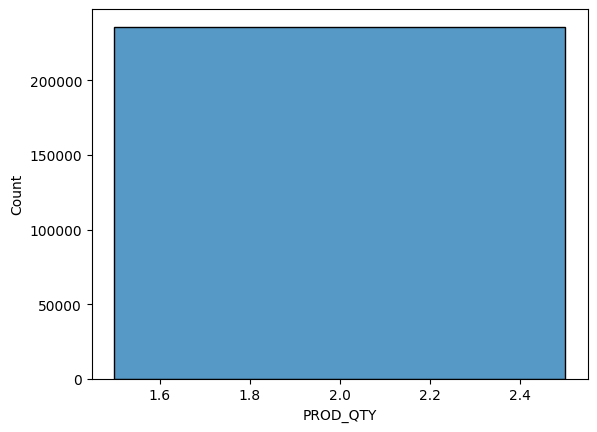

In [16]:
sns.histplot(data=df,x='PROD_QTY')

In [17]:
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage
    

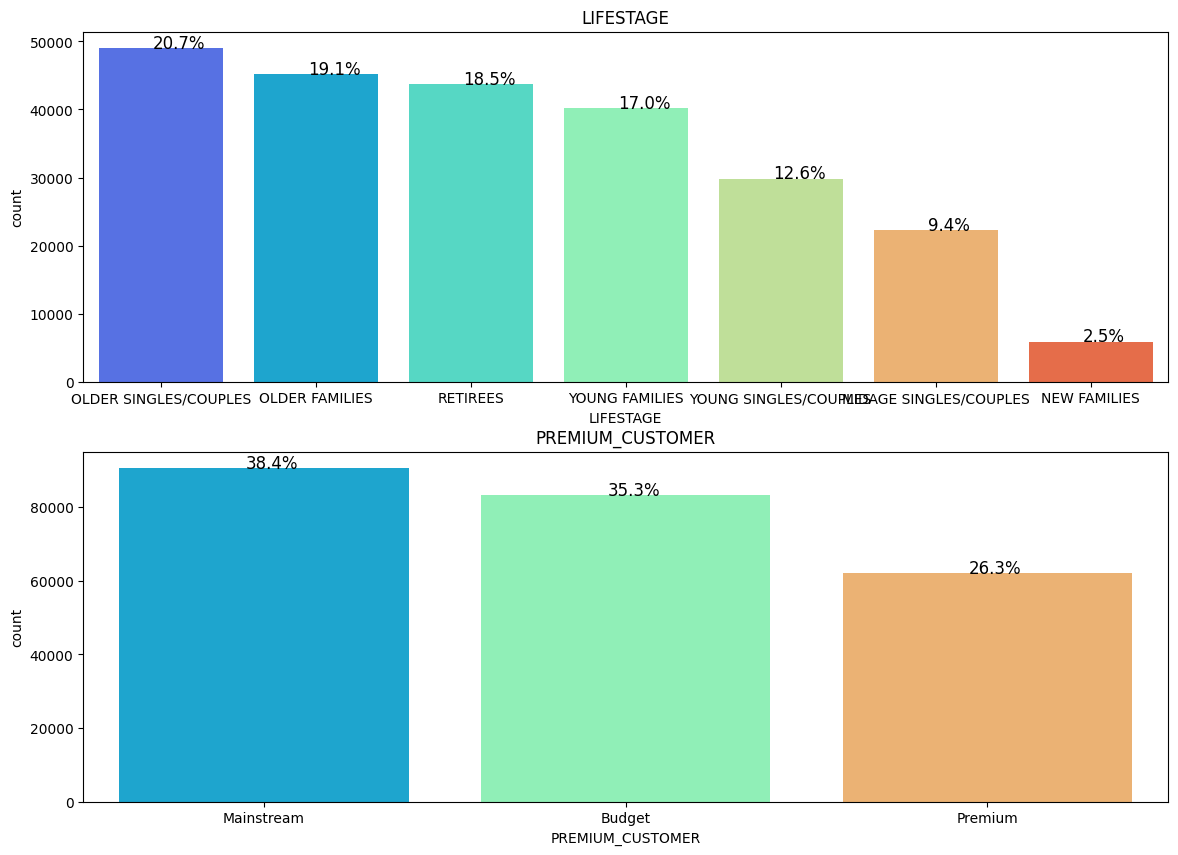

In [18]:
cate_col =  df[['LIFESTAGE', 'PREMIUM_CUSTOMER']].columns
fig1, axes1 =plt.subplots(2,1,figsize=(14, 10))
for i in range(len(cate_col)):
    order = df[cate_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.countplot(x=cate_col[i], data=df , order=order,ax=axes1[i],palette='rainbow').set(title=cate_col[i].upper())
    bar_perc(axes1[i],df[cate_col[i]])

### Observations from Sample Data

1. **Age Distribution**:
   - A significant portion of the population consists of older individuals. Specifically:
     - 20.7% of the population comprises older singles or couples.
     - 19.1% of the population consists of older families.
   - The remaining population is distributed among retailers, young families, couples, and singles.

2. **Customer Segmentation by Spending Category**:
   - When categorizing the population based on spending behavior:
     - 38% of the customers are classified as mainstream.
     - 35% are budget customers.
     - 26.3% are premium customers.



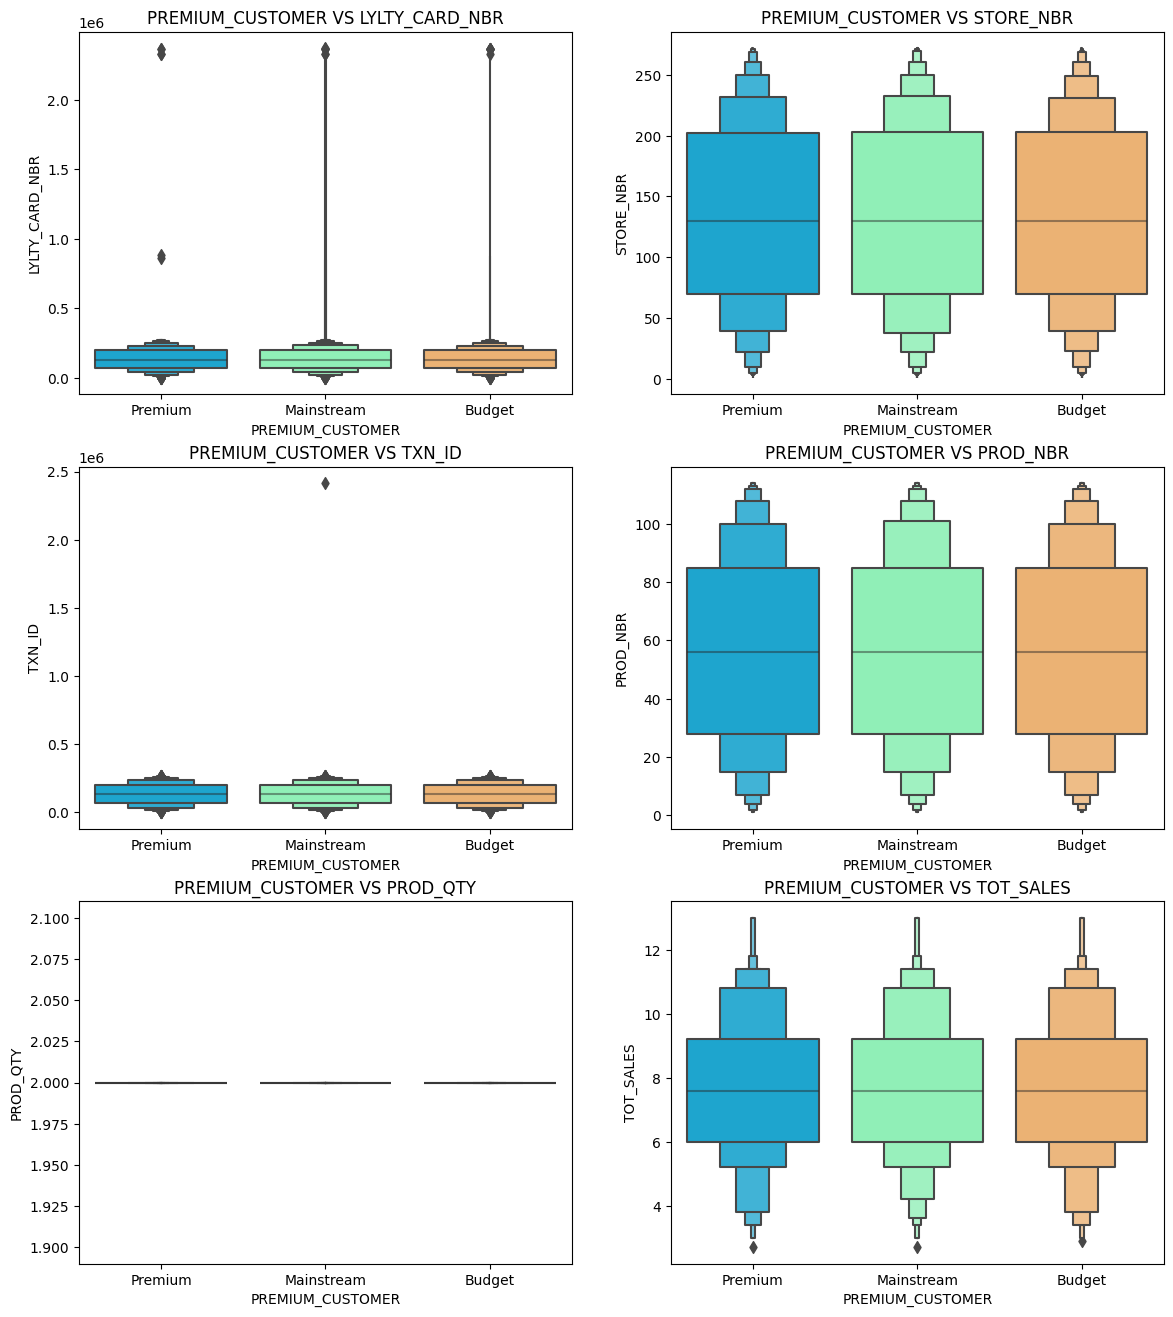

In [19]:
fig , axes = plt.subplots(3,2,figsize=(14,16))
num_col = df.select_dtypes([np.number]).columns

for i in range(len(num_col)):
    row=i//2
    col=i%2
    ax = axes[row,col]
    sns.boxenplot(y=df[num_col[i]],x=df['PREMIUM_CUSTOMER'],ax=ax,palette='rainbow', orient='v').set(title='PREMIUM_CUSTOMER VS '+ num_col[i].upper())

Text(0.5, 1.0, 'TOTAL SALES')

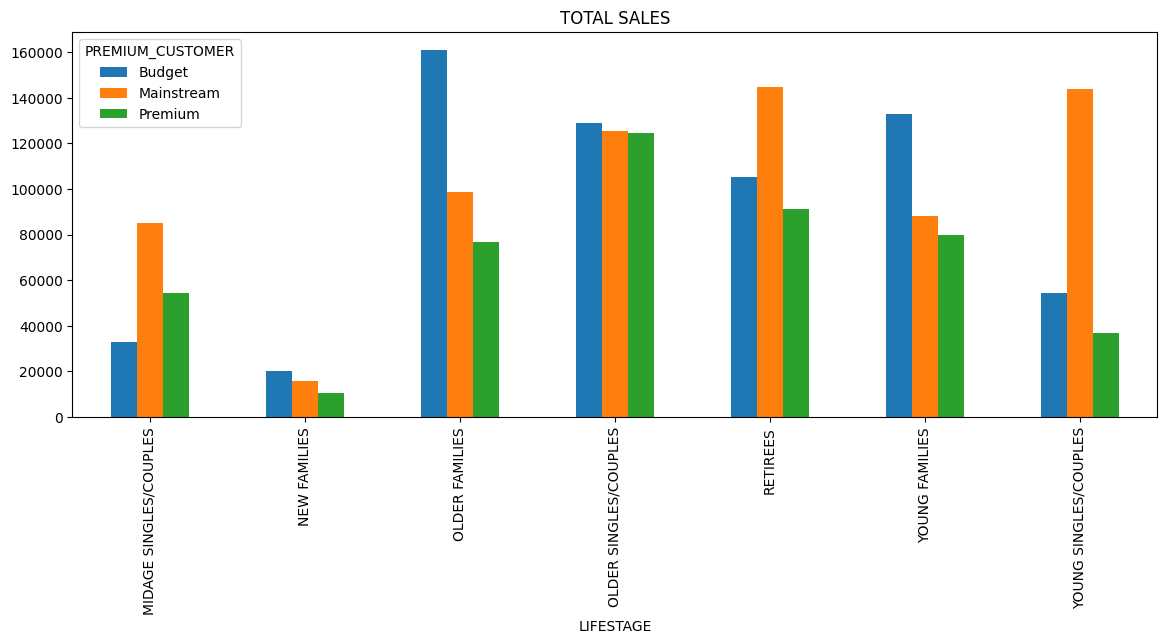

In [20]:
pd.pivot_table(data=df,values='TOT_SALES',aggfunc='sum',index='LIFESTAGE',columns='PREMIUM_CUSTOMER').plot(kind='bar',figsize=(14,5))
plt.title('TOTAL SALES')

The bar graph indicates that older families, older couples, older singles, and retirees are significantly contributing to enhancing our chip's revenue.

In terms of lifestage, people are equally distributed among budget, mainstream, and premium customers. Mid-aged and young singles and couples, as well as retirees, primarily belong to the mainstream customer segment.

In [21]:
pd.pivot_table(data=df,values='TOT_SALES',aggfunc='sum',index='LIFESTAGE',columns='PREMIUM_CUSTOMER').reset_index()

PREMIUM_CUSTOMER,LIFESTAGE,Budget,Mainstream,Premium
0,MIDAGE SINGLES/COUPLES,33073.9,85283.1,54348.8
1,NEW FAMILIES,20113.4,15660.7,10614.6
2,OLDER FAMILIES,160873.3,98846.5,76937.7
3,OLDER SINGLES/COUPLES,128835.0,125474.8,124525.0
4,RETIREES,105386.1,144864.4,91185.4
5,YOUNG FAMILIES,132748.6,88131.9,79862.3
6,YOUNG SINGLES/COUPLES,54218.3,143792.2,36993.2


Text(0.5, 1.0, 'PRODUCT QUNTITY')

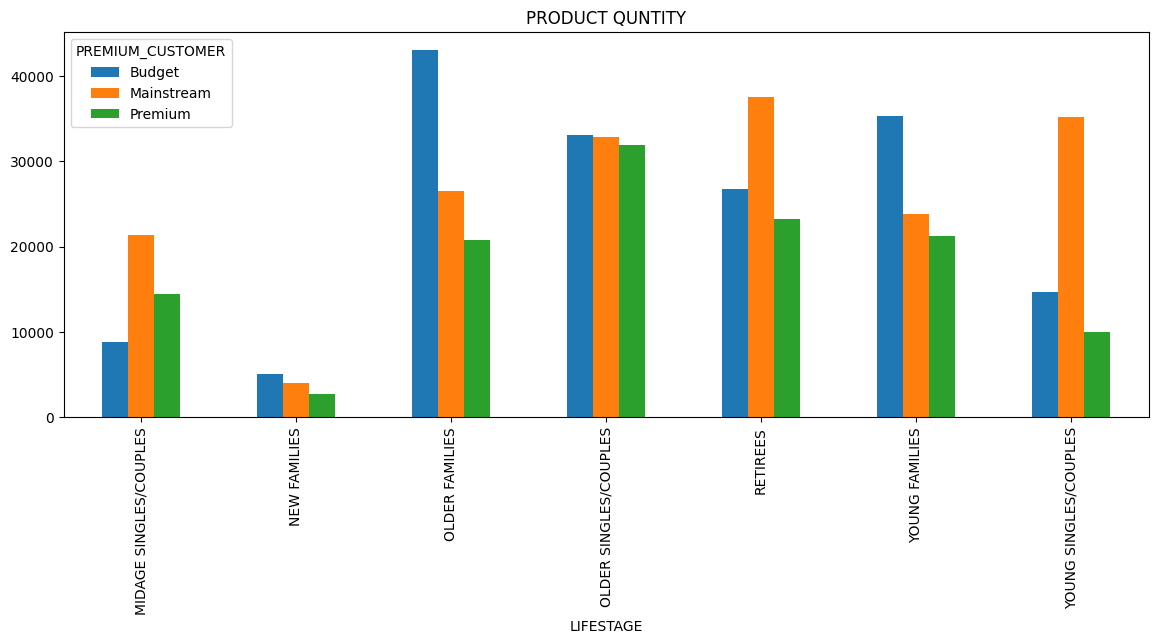

In [22]:
pd.pivot_table(data=df,values='PROD_QTY',aggfunc='sum',index='LIFESTAGE',columns='PREMIUM_CUSTOMER').plot(kind='bar',figsize=(14,5))
plt.title('PRODUCT QUNTITY')

Text(0.5, 1.0, 'Total no of product quentity by Lifestage')

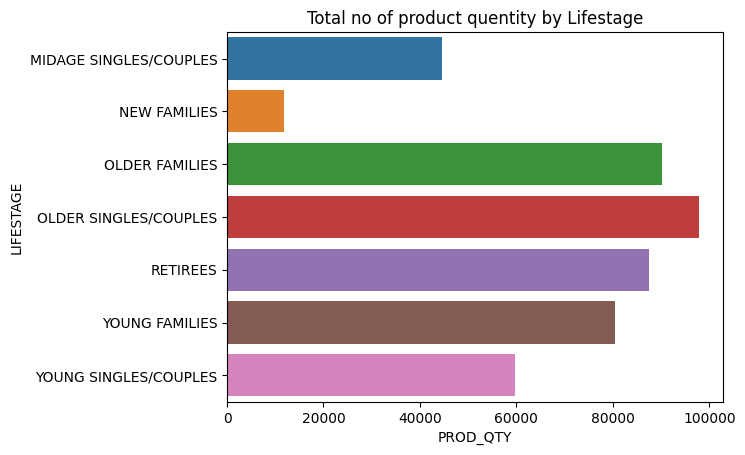

In [23]:
pro = pd.pivot_table(data=df,values='PROD_QTY',aggfunc='sum',index='LIFESTAGE').reset_index()

sns.barplot(data=pro,x='PROD_QTY',y='LIFESTAGE')
plt.title('Total no of product quentity by Lifestage')

Observation: Older families, older couples, older singles, and young families are purchasing the highest quantities of products significantly.

Text(0.5, 1.0, 'TOTAL SALES')

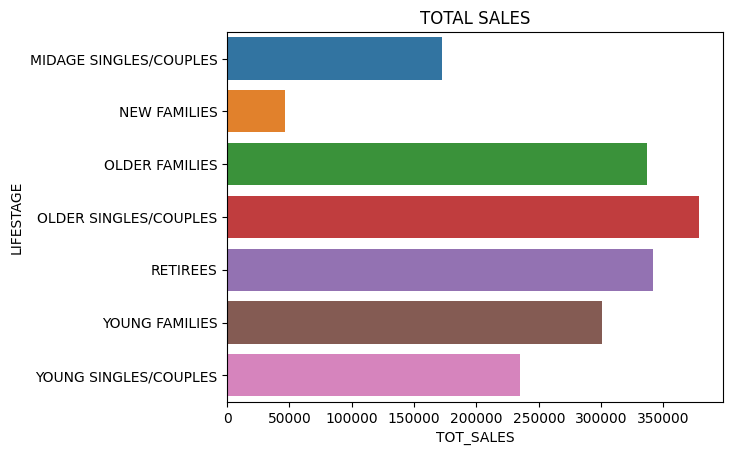

In [24]:
sal = pd.pivot_table(data=df,values='TOT_SALES',aggfunc='sum',index='LIFESTAGE').reset_index()
sns.barplot(data=sal,x='TOT_SALES',y='LIFESTAGE')
plt.title('TOTAL SALES')

**Observation:** Older families, older couples, older singles, and young families are contributing most significantly to the chip's revenue.

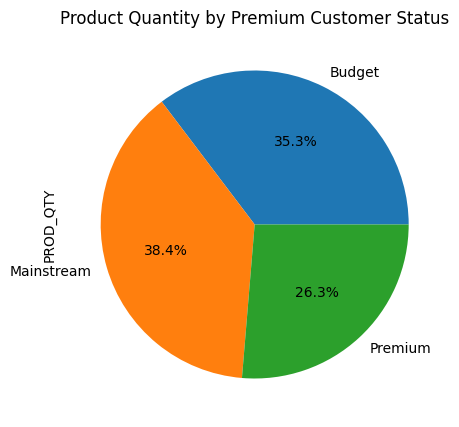

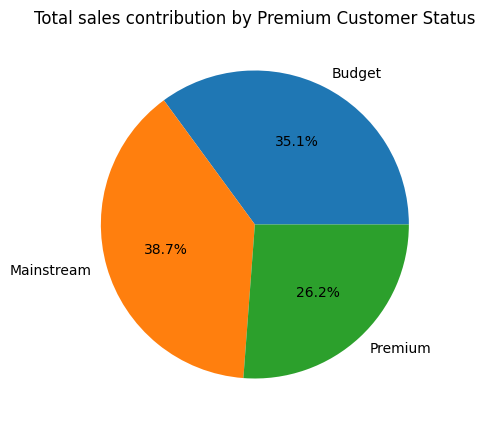

In [25]:
prod_df = pd.pivot_table(data=df, values='PROD_QTY', aggfunc='sum', index='PREMIUM_CUSTOMER')
ren_df = pd.pivot_table(data=df, values='TOT_SALES', aggfunc='sum', index='PREMIUM_CUSTOMER')


# Plot a pie chart

prod_df.plot(kind='pie', subplots=True, figsize=(14, 5), autopct='%1.1f%%', legend=None)
plt.title('Product Quantity by Premium Customer Status')
ren_df.plot(kind='pie', subplots=True, figsize=(14, 5), autopct='%1.1f%%', legend=None)
plt.title('Total sales contribution by Premium Customer Status')


plt.ylabel('')  # Hide the y-label to make the pie chart cleaner
plt.show()

**Observation:** The customer status pie chart indicates that 38% of mainstream customers contribute significantly to revenue by purchasing products in large numbers. Following closely, 35% of customers belong to the budget category, while the remaining 26% fall into the premium category.

In [26]:
df[['TOT_SALES','PROD_QTY']].sum()

TOT_SALES    1811769.2
PROD_QTY      472076.0
dtype: float64

The total number of sales generated is 1,811,769 units, involving 472,076 products or chips across their varieties.

In [27]:
year = df.groupby(pd.Grouper(key='DATE', freq='M'))[['TOT_SALES','PROD_QTY']].sum().reset_index().sort_values(by = 'DATE',ascending=True)

<Axes: xlabel='DATE', ylabel='TOT_SALES'>

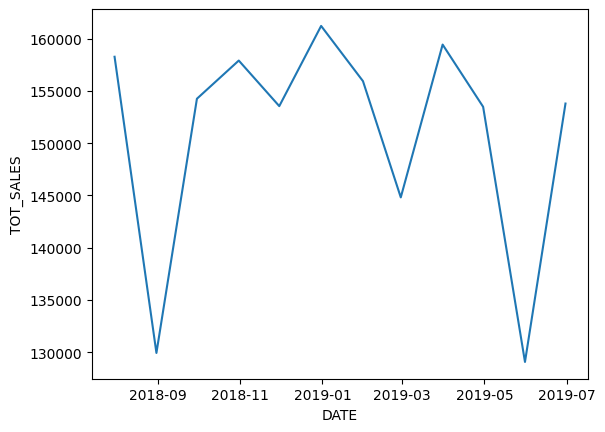

In [28]:
sns.lineplot(data=year,x='DATE',y='TOT_SALES')

> ****This line chart indicates that sales remained consistent, with two noticeable decreases in sales occurring between September 2018 and June 2019.

<Axes: xlabel='DATE', ylabel='PROD_QTY'>

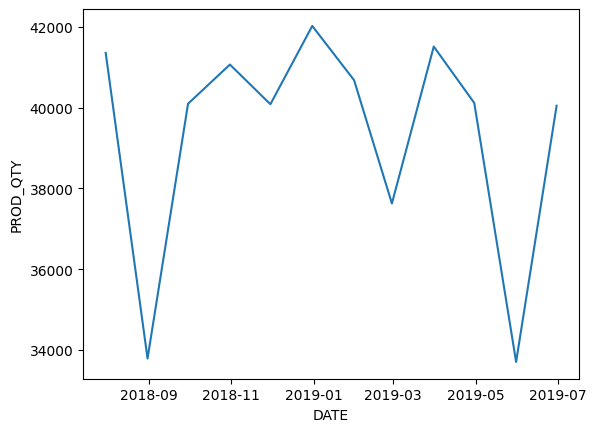

In [29]:
sns.lineplot(data=year,x='DATE',y='PROD_QTY')

Text(0.5, 1.0, 'TOP 5 STORE NO. BY SALES')

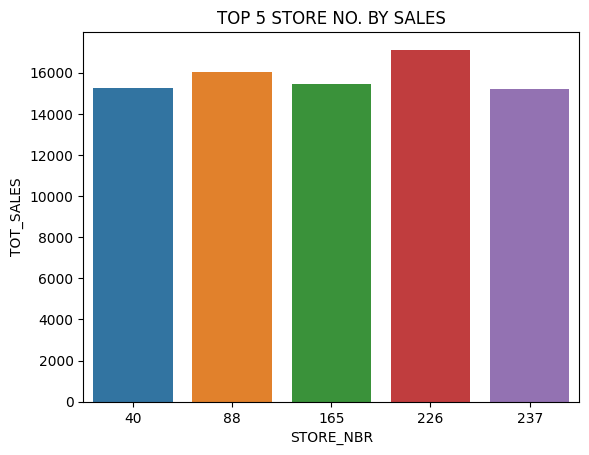

In [30]:
top_store = df.groupby(['STORE_NBR'])['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES',ascending=False).head()
top_store['STORE_NBR'] = top_store['STORE_NBR'].astype('object')
sns.barplot(data=top_store,y='TOT_SALES',x='STORE_NBR')
plt.title("TOP 5 STORE NO. BY SALES")

Here are the top 5 stores that contribute significantly to revenue by selling products in large quantities:

1. Store No. 237
2. Store No. 226
3. Store No. 165
4. Store No. 88
5. Store No. 40

In [31]:
top_store

,STORE_NBR,TOT_SALES
222,226,17116.8
86,88,16022.9
163,165,15449.2
38,40,15275.4
233,237,15204.2


Text(0.5, 1.0, 'TOP 5  PROD_NAME BY SALES')

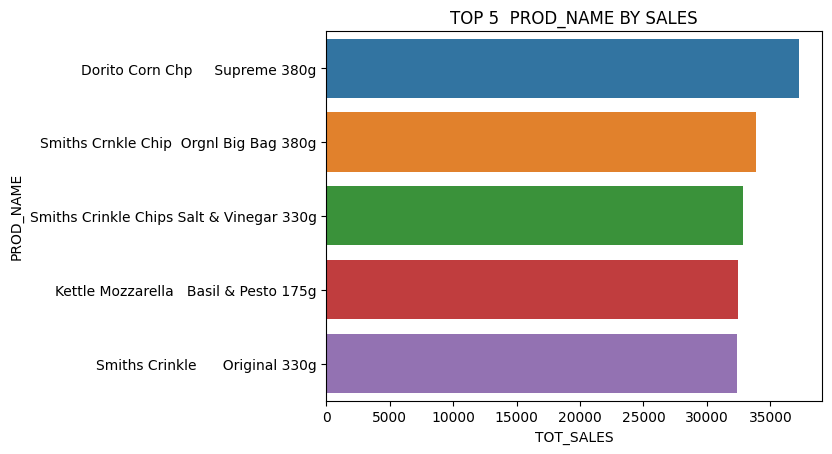

In [32]:
prod_store = df.groupby(['PROD_NAME'])['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES',ascending=False).head()
sns.barplot(data=prod_store,x='TOT_SALES',y='PROD_NAME')
plt.title("TOP 5  PROD_NAME BY SALES")

Here are the top 5 products that contribute significantly to revenue:

1. Dorito Corn Chip Supreme 380g - $37,232.0

2. Smiths Crinkle Chip Original Big Bag 380g - $33,901.4

3. Smiths Crinkle Chips Salt & Vinegar 330g - $32,809.2

4.  Kettle Mozzarella Basil & Pesto 175g - $32,443.2

5. Smiths Crinkle Original 330g - $32,398.8

# Data Analysis Report on Customer Behavior Related to Chip Purchases

## Purpose of Analysis

The purpose of this analysis is to provide insights into customer behavior related to the purchase of chips. The specific goals include:

1. Identifying different customer segments who purchase chips.
2. Analyzing the purchasing behavior of these customer segments within the region.
3. Determining the key drivers that influence chip sales, such as demographics and buying patterns.
4. Making strategic recommendations on which customer segments to target and suggesting any adjustments to packet sizes.

## Task Overview

The task involves analyzing transaction and customer data related to chip purchases using Python. The steps include checking data integrity, handling outliers, and deriving key metrics such as total sales, purchase frequency, and customer segmentation. The insights from this analysis will help Julia, the Category Manager, in her upcoming review.

## Insight Summary

**Total Sales:**
- **Units Sold:** 1,811,769 units
- **Varieties of Products:** 472,076 varieties

**Age Distribution:**
- Older singles or couples: 20.7%
- Older families: 19.1%
- Other segments include young families, couples, and singles.

**Customer Segmentation by Spending Category:**
- Mainstream customers: 38%
- Budget customers: 35%
- Premium customers: 26.3%

### Top 5 Revenue-Contributing Products:
1. **Dorito Corn Chip Supreme 380g:** $37,232.0

2. **Smiths Crinkle Chip Original Big Bag 380g:** $33,901.4

3. **Smiths Crinkle Chips Salt & Vinegar 330g:** $32,809.2

4. **Kettle Mozzarella Basil & Pesto 175g:** $32,443.2

5. **Smiths Crinkle Original 330g:** $32,398.8

### Top 5 Revenue-Contributing Stores:
1. Store No. 237

2. Store No. 226

3. Store No. 165

4. Store No. 88

5. Store No. 40

## Detailed Observations from Sample Data

### Age-Based Insights:
- Older families, older couples, older singles, and retirees are the most significant contributors to chip revenue.
- Young families also show a high quantity of chip purchases.

### Customer Segmentation Insights:
- The population is almost equally distributed among budget, mainstream, and premium customers.
- Mainstream customers (38%) contribute the most to revenue, followed by budget customers (35%) and premium customers (26%).

### Sales Trends:
- Sales remained consistent with two noticeable decreases between September 2018 and June 2019.

## Recommendations

Based on the analysis, the following strategic recommendations are proposed:

### Target Segments:
1. **Older Demographics:**
   - Focus marketing efforts on older singles, couples, and families since they are the largest contributors to chip sales.
2. **Young Families:**
   - Develop promotional campaigns targeting young families as they also show significant purchasing behavior.

### Packet Size Adjustments:
1. **Larger Packets:**
   - Given the high volume of purchases, consider offering larger packet sizes for mainstream and budget customers to drive more bulk purchases.
2. **Smaller Packets:**
   - Introduce smaller packet sizes for premium customers who may prefer variety and quality over quantity.

### Store-Level Strategies:
1. **Top Performing Stores:**
   - Invest in promotional activities and ensure ample stock in top-performing stores (Store Nos. 237, 226, 165, 88, and 40) to maximize sales.
2. **Underperforming Stores:**
   - Analyze and address factors in underperforming stores to boost their sales.

### Seasonal Promotions:
1. **Address Sales Dips:**
   - Investigate the causes of sales dips between September 2018 and June 2019 and plan targeted promotions during these periods to maintain consistent sales.

## Conclusion

This analysis provides valuable insights into the purchasing behavior of different customer segments and highlights key drivers of chip sales. By targeting the right customer segments and making strategic adjustments to product offerings, there is potential to increase overall sales and revenue.